# Data Understanding and Determining Goals

This dataset is acquired from [Kaggle](https://www.kaggle.com/datasets/sandeep1080/bassburst?resource=download), which includes data from 30,000 user sessions, featuring both returning and first-time visitors. The sessions are segmented by the landing page variant each user saw. The data allows for in-depth analysis of user behavior, conversion rates, and the impact of different landing page designs and demographics

Columns:

user_id: Unique identifier for each visitor.

session_id: Unique identifier for each session or visit.

sign_in: Indicates if the user logged in via email or used guest access.

name: Name of the visitor (generated from multiple locales).

demographic_age: Age of the visitor (ranging from 14 to 80).

demographic_age_group: Age group of the visitor: "Teenage", "Adult", "Old".

demographic_gender: Gender of the visitor (Male, Female, Not Answered).

email: Email address of the user (if logged in via email).

location: The city where the visitor is located.

country: Country corresponding to the location.

device_type: Type of device used (Mobile, Desktop, Tablet).

timestamp: Session start time.

variant_group: The landing page design variant the user saw (Vibrant, Cold, Heat).

time_spent: Total time (in minutes) the user spent on the landing page.

pages_visited: Number of pages the user viewed during the session.

conversion_flag: Binary flag (0/1) indicating whether the user converted (signed up or made a purchase).

conversion_type: Type of conversion achieved (Signup or Purchase).

traffic_source: Source of traffic (Organic, Paid, Social, Referral).

product_purchased: List of products purchased (if applicable).

revenue: Total revenue generated from the transaction (if purchase was made).

payment_type: Payment method used (Card or COD).

card_type: Card type if payment was made by card (Amex, Visa, Master).

coupon_applied: Whether a coupon was applied (Yes/No).

bounce_flag: Indicates if the session was a bounce (only one page visited).

Project Goals: \
The target of this project is to know if the landing page design affects the conversion of customers. The appropriate landing page design is then analysed through hypothesis testing betwen Vibrant, Cold, and Heat variant to identify which one contributes the highest conversions.

# Data Cleaning

In [ ]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
from scipy.stats import chi2_contingency
from statsmodels.stats.weightstats import ztest
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.proportion import proportions_ztest
import seaborn as sns

In [ ]:
#connect colab to drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#reading dataset
df = pd.read_csv('/content/drive/MyDrive/Data Science/Assignment/Final Project Data Analyst/cleaned_speakers_data.csv')
df.sample(3)

,user_id,session_id,sign_in,name,demographic_age,demographic_age_group,demographic_gender,email,location,country,...,pages_visited,conversion_flag,conversion_type,traffic_source,product_purchased,revenue_$,payment_type,card_type,coupon_applied,bounce_flag
5655,U12918,S005656,Email,山田 加奈,40,Adult,Female,山田加奈143@hotmail.com,Delhi,India,...,10,0,NCT,Organic,NPP,0.0,NPT,NCAT,ND,0
2664,U00590,S002665,Email,Joshua Maddox,42,Adult,Female,joshuamaddox249@gmail.com,Paris,France,...,8,0,NCT,Organic,NPP,0.0,NPT,NCAT,ND,0
2495,U11338,S002496,Email,Michelle Camus,29,Adult,Female,michellecamus367@yahoo.com,Sydney,Australia,...,9,0,NCT,Paid,NPP,0.0,NPT,NCAT,ND,0


## Duplicate

In [ ]:
#check duplicate
dup = df[df.duplicated]
dup

,user_id,session_id,sign_in,name,demographic_age,demographic_age_group,demographic_gender,email,location,country,...,pages_visited,conversion_flag,conversion_type,traffic_source,product_purchased,revenue_$,payment_type,card_type,coupon_applied,bounce_flag


No duplicate is found

## Missing Value

In [ ]:
#check missing value
df.isnull().sum()

,0
user_id,0
session_id,0
sign_in,0
name,0
demographic_age,0
demographic_age_group,0
demographic_gender,0
email,0
location,0
country,0


No missing value in the form of NaN is found

In [ ]:
#check any missing value in sign in
df['sign_in'].unique()

array(['Email', 'Guest'], dtype=object)

No missing value in sign in

In [ ]:
#check any missing value in age
df['demographic_age'].unique()

array([31, 39, 68, 72, 51, 35, 43, 45, 79, 73, 28, 78, 53, 70, 21, 15, 62,
       22, 54, 26, 52, 27, 76, 33, 58, 69, 14, 38, 71, 44, 67, 17, 42, 57,
       80, 25, 49, 30, 29, 50, 55, 19, 74, 18, 63, 77, 66, 37, 59, 23, 75,
       41, 56, 24, 48, 32, 34, 16, 65, 64, 47, 36, 60, 20, 46, 61, 40])

No missing value in age

In [ ]:
#check any missing value in age group
df['demographic_age_group'].unique()

array(['Adult', 'Old', 'Teenage'], dtype=object)

No missing value in age group

In [ ]:
#check any missing value in sign in
df['demographic_gender'].unique()

array(['Female', 'Male', 'No Answer'], dtype=object)

Not Answer is not considered as missing value, however it might be droped in case gender related analysis is required

In [ ]:
#check any missing value in country
df['country'].unique()

array(['Italy', 'Spain', 'UK', 'Australia', 'India', 'China', 'Germany',
       'France', 'UAE', 'Canada', 'USA', 'Japan', 'Singapore', 'Russia',
       'Hong Kong'], dtype=object)

No missing value in country

In [ ]:
#check any missing value in device type
df['device_type'].unique()

array(['Desktop', 'Mobile', 'Tablet'], dtype=object)

No missing value in device type

In [ ]:
#check any missing value in variant group
df['variant_group'].unique()

array(['Heat', 'Vibrant', 'Cold'], dtype=object)

No missing value in variant group

In [ ]:
#check any missing value in page visited
df['pages_visited'].unique()

array([ 7,  5, 10,  6,  9,  3,  2,  8,  4,  1])

No missing value in page visited

In [ ]:
#check any missing value in conversion_flag
df['conversion_flag'].unique()

array([0, 1])

No missing value in conversion flag

In [ ]:
#check any missing value in conversion_type
df['conversion_type'].unique()

array(['NCT', 'Purchase', 'Signup'], dtype=object)

In [ ]:
df[df['conversion_type'] == 'NCT']

,user_id,session_id,sign_in,name,demographic_age,demographic_age_group,demographic_gender,email,location,country,...,pages_visited,conversion_flag,conversion_type,traffic_source,product_purchased,revenue_$,payment_type,card_type,coupon_applied,bounce_flag
0,U10477,S000001,Email,Victor Navarro-Noël,31,Adult,Female,victornavarronoël251@hotmail.com,Rome,Italy,...,7,0,NCT,Organic,NPP,0.0,NPT,NCAT,ND,1
1,U01536,S000002,Email,王秀云,39,Adult,Female,王秀云617@gmail.com,Madrid,Spain,...,5,0,NCT,Social,NPP,0.0,NPT,NCAT,ND,0
2,U00107,S000003,Guest,Ucchal Sabharwal,68,Old,Male,Not Provided,Manchester,UK,...,7,0,NCT,Organic,NPP,0.0,NPT,NCAT,ND,0
3,U13886,S000004,Email,Virginie Schmitt,72,Old,Female,virginieschmitt827@gmail.com,Sydney,Australia,...,10,0,NCT,Social,NPP,0.0,NPT,NCAT,ND,0
4,U05926,S000005,Email,Cynthia Drake,51,Adult,No Answer,cynthiadrake47@hotmail.com,Mumbai,India,...,6,0,NCT,Organic,NPP,0.0,NPT,NCAT,ND,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29993,U09695,S029994,Email,Ranveer Balay,78,Old,Male,ranveerbalay142@outlook.com,Toronto,Canada,...,10,0,NCT,Organic,NPP,0.0,NPT,NCAT,ND,0
29994,U06035,S029995,Guest,邓兵,43,Adult,Female,Not Provided,Madrid,Spain,...,7,0,NCT,Paid,NPP,0.0,NPT,NCAT,ND,0
29996,U10440,S029997,Email,Aurélie Jacob,51,Adult,Female,auréliejacob443@protonmail.com,Hong Kong,Hong Kong,...,4,0,NCT,Social,NPP,0.0,NPT,NCAT,ND,0
29997,U07125,S029998,Email,Rodney Miller,15,Teenage,Female,rodneymiller655@gmail.com,Tokyo,Japan,...,2,0,NCT,Social,NPP,0.0,NPT,NCAT,ND,0


What is NCT? Possibly No Conversion Type \
There no missing value in conversion type

In [ ]:
#check any missing value in traffic_source
df['traffic_source'].unique()

array(['Organic', 'Social', 'Paid', 'Referral'], dtype=object)

No missing value in traffic source

In [ ]:
#check any missing value in payment_type
df['payment_type'].unique()

array(['NPT', 'Card', 'COD'], dtype=object)

What is NPT? It is possibly Nerwork Payment Tokens \
Therefore, no missing value in payment type

In [ ]:
#check any missing value in card_type
df['card_type'].unique()

array(['NCAT', 'Visa', 'Amex', 'Master'], dtype=object)

In [ ]:
#See if NCAT are customers that pays COD
df[df['card_type'] == 'NCAT']

,user_id,session_id,sign_in,name,demographic_age,demographic_age_group,demographic_gender,email,location,country,...,pages_visited,conversion_flag,conversion_type,traffic_source,product_purchased,revenue_$,payment_type,card_type,coupon_applied,bounce_flag
0,U10477,S000001,Email,Victor Navarro-Noël,31,Adult,Female,victornavarronoël251@hotmail.com,Rome,Italy,...,7,0,NCT,Organic,NPP,0.00,NPT,NCAT,ND,1
1,U01536,S000002,Email,王秀云,39,Adult,Female,王秀云617@gmail.com,Madrid,Spain,...,5,0,NCT,Social,NPP,0.00,NPT,NCAT,ND,0
2,U00107,S000003,Guest,Ucchal Sabharwal,68,Old,Male,Not Provided,Manchester,UK,...,7,0,NCT,Organic,NPP,0.00,NPT,NCAT,ND,0
3,U13886,S000004,Email,Virginie Schmitt,72,Old,Female,virginieschmitt827@gmail.com,Sydney,Australia,...,10,0,NCT,Social,NPP,0.00,NPT,NCAT,ND,0
4,U05926,S000005,Email,Cynthia Drake,51,Adult,No Answer,cynthiadrake47@hotmail.com,Mumbai,India,...,6,0,NCT,Organic,NPP,0.00,NPT,NCAT,ND,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,U08032,S029996,Email,Radhika Gole,15,Teenage,Male,radhikagole401@outlook.com,Sydney,Australia,...,1,1,Signup,Social,NPP,0.00,NPT,NCAT,ND,1
29996,U10440,S029997,Email,Aurélie Jacob,51,Adult,Female,auréliejacob443@protonmail.com,Hong Kong,Hong Kong,...,4,0,NCT,Social,NPP,0.00,NPT,NCAT,ND,0
29997,U07125,S029998,Email,Rodney Miller,15,Teenage,Female,rodneymiller655@gmail.com,Tokyo,Japan,...,2,0,NCT,Social,NPP,0.00,NPT,NCAT,ND,0
29998,U03820,S029999,Email,牛秀珍,73,Old,Female,牛秀珍771@gmail.com,Singapore,Singapore,...,8,1,Purchase,Paid,Sony SRS-XB43,249.99,COD,NCAT,No,0


What is NCAT? Possibly No Card Type as those that purchase COD or does not have any conversion \
Therefore no missing value in card type

In [ ]:
#check any missing value in coupon_applied
df['coupon_applied'].unique()

array(['ND', 'No', 'Yes'], dtype=object)

What is ND? Possibly No Discount \
So no missing value in coupon applied

In [ ]:
#check any missing value in bounce_flag
df['bounce_flag'].unique()

array([1, 0])

##Data Type

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                30000 non-null  object 
 1   session_id             30000 non-null  object 
 2   sign_in                30000 non-null  object 
 3   name                   30000 non-null  object 
 4   demographic_age        30000 non-null  int64  
 5   demographic_age_group  30000 non-null  object 
 6   demographic_gender     30000 non-null  object 
 7   email                  30000 non-null  object 
 8   location               30000 non-null  object 
 9   country                30000 non-null  object 
 10  device_type            30000 non-null  object 
 11  timestamp              30000 non-null  object 
 12  variant_group          30000 non-null  object 
 13  time_spent             30000 non-null  float64
 14  pages_visited          30000 non-null  int64  
 15  co

In [ ]:
#converting timestamp into datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

#converting conversion flag in boolean
#df['conversion_type'] = df['conversion_type'].astype(bool)

#converting bounce flag in boolean
df['bounce_flag'] = df['bounce_flag'].astype(bool)

In [ ]:
df['timestamp'].describe()

,timestamp
count,30000
mean,2025-01-26 00:24:42.630915072
min,2025-01-01 00:01:18.569492
25%,2025-01-13 11:59:31.570923008
50%,2025-01-26 01:11:56.911847424
75%,2025-02-07 10:42:08.768300032
max,2025-02-19 21:27:27.575775


A/B is done from 2025-01-01 to 2025-02-19

##Outlier

/tmp/ipython-input-2142388086.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(df[col], labels=[col], patch_artist=True)


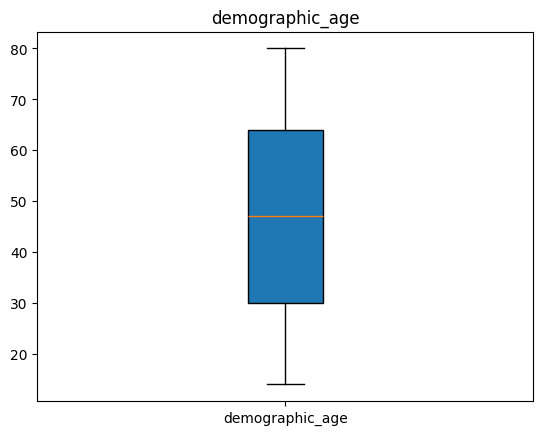

/tmp/ipython-input-2142388086.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(df[col], labels=[col], patch_artist=True)


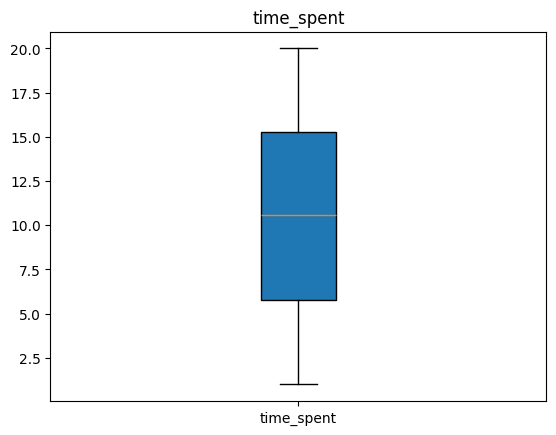

/tmp/ipython-input-2142388086.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(df[col], labels=[col], patch_artist=True)


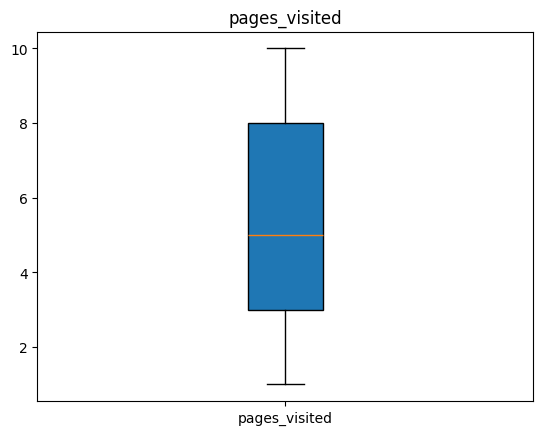

/tmp/ipython-input-2142388086.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(df[col], labels=[col], patch_artist=True)


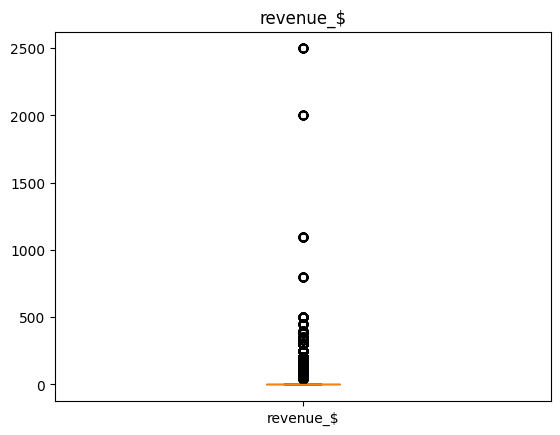

In [ ]:
#Plot boxplot to visualize outlier
numeric = df[['demographic_age', 'time_spent', 'pages_visited', 'revenue_$']]

for col in numeric:
    plt.figure()
    plt.boxplot(df[col], labels=[col], patch_artist=True)
    plt.title(col)
    plt.show()

(array([28479.,   962.,   270.,   122.,     0.,    47.,     0.,    53.,
            0.,     0.,     0.,     0.,    31.,     0.,     0.,    36.]),
 array([   0.    ,  156.1875,  312.375 ,  468.5625,  624.75  ,  780.9375,
         937.125 , 1093.3125, 1249.5   , 1405.6875, 1561.875 , 1718.0625,
        1874.25  , 2030.4375, 2186.625 , 2342.8125, 2499.    ]),
 <BarContainer object of 16 artists>)

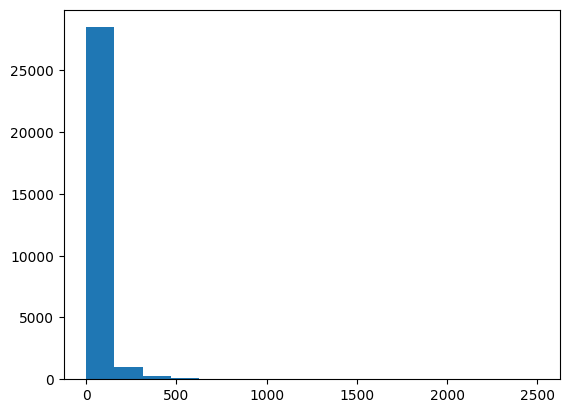

In [ ]:
#plot barchart of revenue to see the distribution

plt.hist(df['revenue_$'], bins='auto')

In [ ]:
#Check products with high price
df[df['revenue_$'] > 2000]

,user_id,session_id,sign_in,name,demographic_age,demographic_age_group,demographic_gender,email,location,country,...,pages_visited,conversion_flag,conversion_type,traffic_source,product_purchased,revenue_$,payment_type,card_type,coupon_applied,bounce_flag
207,U12600,S000208,Email,叶静,17,Teenage,Female,叶静407@outlook.com,Shanghai,China,...,9,1,Purchase,Organic,Bang & Olufsen Beosound A9,2499.0,Card,Master,Yes,False
1202,U08787,S001203,Email,Idika Lalla,29,Adult,Male,idikalalla981@protonmail.com,Los Angeles,USA,...,9,1,Purchase,Organic,Bang & Olufsen Beosound A9,2499.0,Card,Amex,Yes,False
2445,U02486,S002446,Email,陆柳,78,Old,Male,陆柳216@outlook.com,Rome,Italy,...,10,1,Purchase,Referral,Bang & Olufsen Beosound A9,2499.0,Card,Visa,No,False
2535,U03701,S002536,Email,井上 陽子,16,Teenage,Male,井上陽子954@outlook.com,Toronto,Canada,...,10,1,Purchase,Social,Bang & Olufsen Beosound A9,2499.0,COD,NCAT,No,False
2774,U11240,S002775,Email,Robert White,78,Old,Female,robertwhite843@hotmail.com,New York,USA,...,5,1,Purchase,Paid,Bang & Olufsen Beosound A9,2499.0,Card,Visa,No,False
4068,U08721,S004069,Email,Tanveer Madan,70,Old,Male,tanveermadan555@outlook.com,Shanghai,China,...,4,1,Purchase,Referral,Bang & Olufsen Beosound A9,2499.0,COD,NCAT,No,False
4179,U08056,S004180,Email,David Ayers,66,Old,Male,davidayers305@gmail.com,Paris,France,...,8,1,Purchase,Organic,Bang & Olufsen Beosound A9,2499.0,Card,Amex,No,False
7421,U03649,S007422,Guest,鈴木 春香,30,Adult,Male,Not Provided,Toronto,Canada,...,9,1,Purchase,Organic,Bang & Olufsen Beosound A9,2499.0,Card,Master,No,False
7552,U01420,S007553,Email,Josette-Alex Lévy,55,Adult,Female,josettealexlévy809@yahoo.com,Munich,Germany,...,4,1,Purchase,Social,Bang & Olufsen Beosound A9,2499.0,Card,Amex,No,True
8488,U14248,S008489,Guest,長谷川 陽子,44,Adult,Male,Not Provided,Vancouver,Canada,...,4,1,Purchase,Organic,Bang & Olufsen Beosound A9,2499.0,Card,Amex,Yes,False


This store sells a wide variety of products with different prices. 'Bang & Olufsen Beosound A9' is a pricey speaker, therefore it is not an outlier.

# A/B Testing

NOTE: Conversion rate is the percentage a customer dont a conversion by the total customer of each landing page variant

## Landing page variant and Conversion

Hypothesis testing to see if the landing page variant affects the conversion of the customers

H0 = There is no significant difference in conversion and landing page variant \
H1= There is a significant difference in conversion and landing page variant

In [ ]:
page = pd.crosstab(df['variant_group'], df['conversion_flag'])
chi2, p_value, dof, expected = chi2_contingency(page)

print(f"chi-square statistic: {chi2}")
print(f"p_value: {p_value}")
print(f"Degrees of freedom: {dof}")
print(f"Expected frequencies: {expected}")
print("----------------------------------------------Conclusion----------------------------------------------")

alpha = 0.05
if p_value < alpha:
  print("Reject null hypothesis: There is a significant difference in conversion and landing page variant")
else:
  print("Fail to reject null hypothesis: There is no significant difference in conversion and landing page variant")

chi-square statistic: 137.61570927119965
p_value: 1.3095691031638708e-30
Degrees of freedom: 2
Expected frequencies: [[8427.21733333 1500.78266667]
 [8510.403      1515.597     ]
 [8527.37966667 1518.62033333]]
----------------------------------------------Conclusion----------------------------------------------
Reject null hypothesis: There is a significant difference in conversion and landing page variant


In [ ]:
df['variant_group'].unique()

array(['Heat', 'Vibrant', 'Cold'], dtype=object)

Paired z-test to see which landing page shows better conversion rate

In [ ]:
heat = df[df['variant_group'] == 'Heat']['conversion_flag']
vibrant = df[df['variant_group'] == 'Vibrant']['conversion_flag']
cold = df[df['variant_group'] == 'Cold']['conversion_flag']

p_values=[]
comparisons=[]

#compare heat vs vibrant
count = [heat.sum(), vibrant.sum()]
nobs = [len(heat), len(vibrant)]
stat_heatvibrant, p_heatvibrant = proportions_ztest(count, nobs)
p_values.append(p_heatvibrant)
comparisons.append("Heat vs Vibrant")

#compare heat vs cold
count = [heat.sum(), cold.sum()]
nobs = [len(heat), len(cold)]
stat_heatcold, p_heatcold = proportions_ztest(count, nobs)
p_values.append(p_heatcold)
comparisons.append("Heat vs Cold")

#compare vibrant vs cold
count = [vibrant.sum(), cold.sum()]
nobs = [len(vibrant), len(cold)]
stat_vibrantcold, p_vibrantcold = proportions_ztest(count, nobs)
p_values.append(p_vibrantcold)
comparisons.append("Vibrant vs Cold")

for comp, p in zip(comparisons, p_values):
  if p < 0.05:
    result= "a significant difference"
  else:
    result="not signifant"
  print(f"{comp} have p-value: {p} therefore {result}")

Heat vs Vibrant have p-value: 3.731603827808987e-10 therefore a significant difference
Heat vs Cold have p-value: 3.377952366928148e-08 therefore a significant difference
Vibrant vs Cold have p-value: 8.12365179082147e-32 therefore a significant difference


Identifying which landing page have better conversion rate

In [ ]:
df.groupby('variant_group')['conversion_flag'].mean()

,conversion_flag
variant_group,
Cold,0.180802
Heat,0.151706
Vibrant,0.121342


In [ ]:
df.groupby('variant_group')['conversion_flag'].sum()

,conversion_flag
variant_group,
Cold,1795
Heat,1521
Vibrant,1219


Cold landing page variant shows a higher percentage in conversion rate (meaning from customer who visit through cold landing page, 18% of them converted), followed by Heat (15%) and vibrant (12%). Therefore, in order to achieve a high conversion rate, cold landing page design is recommended.

In [ ]:
df[df['variant_group'] == 'Cold']['conversion_type'].value_counts(normalize=True)

,proportion
conversion_type,
NCT,0.819198
Purchase,0.121072
Signup,0.059730


In [ ]:
df.groupby(['country', 'variant_group'])['conversion_flag'].mean()

country    variant_group
Australia  Cold             0.173971
           Heat             0.149936
           Vibrant          0.132296
Canada     Cold             0.167710
           Heat             0.169960
           Vibrant          0.140931
China      Cold             0.206117
           Heat             0.146207
           Vibrant          0.125786
France     Cold             0.191656
           Heat             0.148771
           Vibrant          0.132000
Germany    Cold             0.203728
           Heat             0.147771
           Vibrant          0.105691
Hong Kong  Cold             0.149367
           Heat             0.156085
           Vibrant          0.086849
India      Cold             0.179766
           Heat             0.141397
           Vibrant          0.111303
Italy      Cold             0.194647
           Heat             0.149584
           Vibrant          0.101064
Japan      Cold             0.163399
           Heat             0.150327
           Vibrant          0.127364
Russia     Cold             0.184066
           Heat             0.132768
           Vibrant          0.097368
Singapore  Cold             0.155620
           Heat             0.171123
           Vibrant          0.113924
Spain      Cold             0.206186
           Heat             0.145679
           Vibrant          0.131234
UAE        Cold             0.191011
           Heat             0.166667
           Vibrant          0.134177
UK         Cold             0.180217
           Heat             0.136752
           Vibrant          0.131682
USA        Cold             0.169284
           Heat             0.166524
           Vibrant          0.120674
Name: conversion_flag, dtype: float64

##What percentage of customers done a conversion?

In [ ]:
#find the % distribution of conversion
converted = df.groupby('conversion_flag').size()
total = df['conversion_flag'].count()

convert = (converted/total)*100
print(convert)

conversion_flag
0    84.883333
1    15.116667
dtype: float64


Only 15% of customers done the conversion

#EDA

## Customer's gender

In [ ]:
gender = df['demographic_gender'].value_counts(normalize=True)*100
gender_df = gender.reset_index()
gender_df.columns = ['Gender', 'Percentage']
gender_df

,Gender,Percentage
0,Male,45.353333
1,Female,44.956667
2,No Answer,9.690000


Text(0.5, 1.0, 'Customer gender distribution')

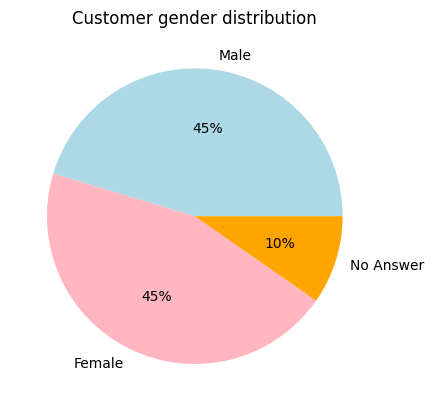

In [ ]:
fig, ax = plt.subplots()
ax.pie(gender_df['Percentage'],
       labels=gender_df['Gender'],
       colors=['lightblue', 'lightpink', 'orange'],
       autopct='%1.0f%%')
plt.title('Customer gender distribution')

##Customer's age distribution

In [ ]:
age = df['demographic_age_group'].value_counts(normalize=True)*100
age_df = age.reset_index()
age_df.columns = ['Age Group', 'Percentage']
age_df

,Age Group,Percentage
0,Adult,67.130000
1,Old,23.853333
2,Teenage,9.016667


Text(0.5, 1.0, 'Customer age distribution')

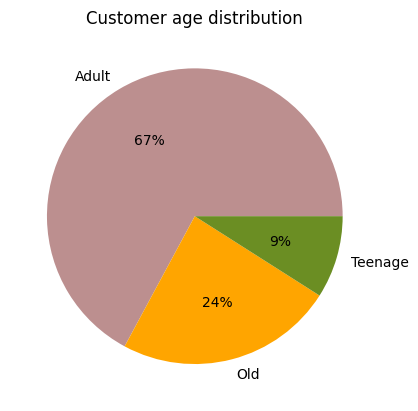

In [ ]:
fig, ax = plt.subplots()
ax.pie(age_df['Percentage'],
       labels=age_df['Age Group'],
       colors=['rosybrown', 'orange', 'olivedrab'],
       autopct='%1.0f%%')
plt.title('Customer age distribution')

## Device used by customers

In [ ]:
#The devices used by customers
print("-----------------------------Devices used by customers-----------------------------")
print(pd.crosstab(df['conversion_flag'], df['device_type'], normalize='index')*100)

-----------------------------Devices used by customers-----------------------------
device_type        Desktop     Mobile     Tablet
conversion_flag                                 
0                29.789908  60.145297  10.064795
1                30.143330  59.360529  10.496141


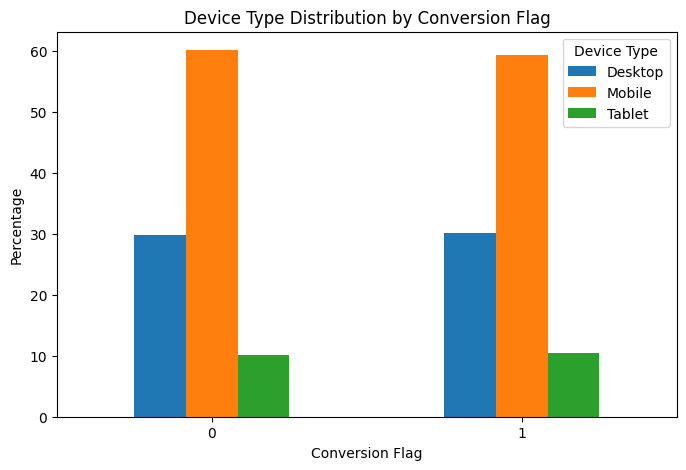

In [ ]:
device=pd.crosstab(df['conversion_flag'], df['device_type'], normalize='index')*100

device.plot(kind='bar', figsize=(8,5))
plt.title('Device Type Distribution by Conversion Flag')
plt.xlabel('Conversion Flag')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(title='Device Type')
plt.show()

Most customers are using Mobile as their devices. The ratio of customer's device that converted and not converted are the same, that is mobile user is the top, followed by desktop and tablet. Therefore, we can further improve the website by focusing on mobile users

## Customer's traffic source

In [ ]:
#Customer's traffic source
print("-----------------------------Customers traffic source-----------------------------")
print(pd.crosstab(df['conversion_flag'], df['traffic_source'], normalize='index')*100)

-----------------------------Customers traffic source-----------------------------
traffic_source     Organic       Paid  Referral     Social
conversion_flag                                           
0                50.261143  19.701551  9.907716  20.129590
1                50.385888  20.573319  9.944873  19.095921


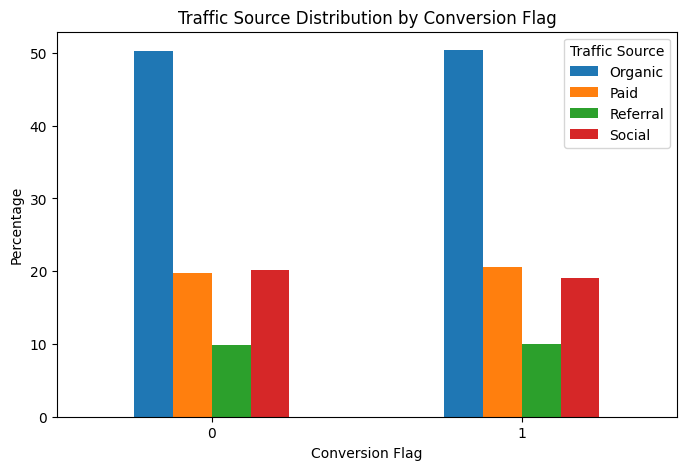

In [ ]:
traffic=pd.crosstab(df['conversion_flag'], df['traffic_source'], normalize='index')*100

traffic.plot(kind='bar', figsize=(8,5))
plt.title('Traffic Source Distribution by Conversion Flag')
plt.xlabel('Conversion Flag')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(title='Traffic Source')
plt.show()

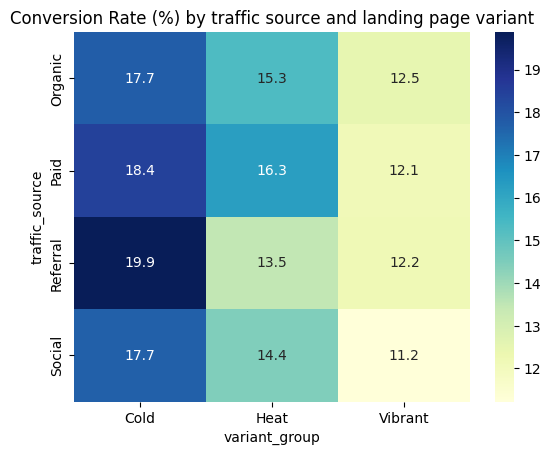

In [ ]:
heat = df.groupby(['traffic_source', 'variant_group'])['conversion_flag'].mean().unstack() * 100
sns.heatmap(heat, annot=True, cmap='YlGnBu', fmt='.1f')
plt.title('Conversion Rate (%) by traffic source and landing page variant')
plt.show()

50% of customers came from organic traffic source, meaning customers searche up the website or products related to the website. However, referral traffic source has the highest conversion rate for cold variant (19.9%). This means 19.9% of customers using cold variant from referrall traffic has dont a conversion. Therefore we can increase organic traffic to increase engagement/awareness and using referral for high conversion.

### Conversion to Numeric Variables

Using heatmap to see the correlation (directly or inversely) relation between numeric variables

                 demographic_age  time_spent  pages_visited  conversion_flag  \
demographic_age         1.000000   -0.005746       0.002432         0.005814   
time_spent             -0.005746    1.000000      -0.002014         0.001299   
pages_visited           0.002432   -0.002014       1.000000        -0.003502   
conversion_flag         0.005814    0.001299      -0.003502         1.000000   
revenue_$              -0.003145    0.000646       0.005396         0.452355   
bounce_flag            -0.000080   -0.005492      -0.358338         0.006317   

                 revenue_$  bounce_flag  
demographic_age  -0.003145    -0.000080  
time_spent        0.000646    -0.005492  
pages_visited     0.005396    -0.358338  
conversion_flag   0.452355     0.006317  
revenue_$         1.000000    -0.002299  
bounce_flag      -0.002299     1.000000  


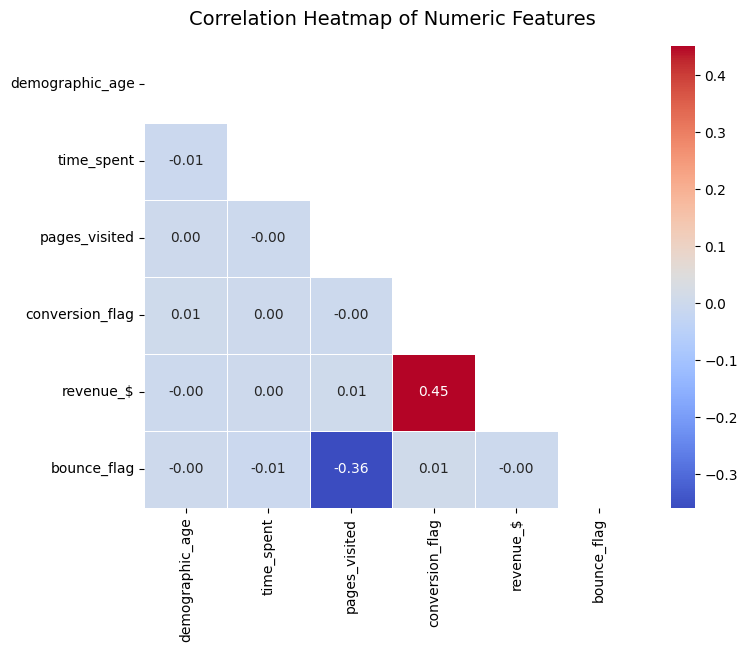

In [ ]:
correlation = df.corr(numeric_only=True)
print(correlation)

mask = np.triu(np.ones_like(correlation, dtype=bool))

plt.figure(figsize=(8,6))
sns.heatmap(
    correlation,
    annot=True,
    mask=mask,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=0.5
)

plt.title('Correlation Heatmap of Numeric Features', fontsize=14, pad=15)
plt.show()

There are two key points to take from the heatmap:
*   The revenue of the product have positive correlation with conversion
*   Total number of page visited has negative correlation with bounceflag



### Conversion and revenue

We want to see the product price category prefered by customers. By knowing the price preferences, we can recommend customers accordingly to push into purchase conversions

In [ ]:
#Check type of revenue
df['conversion_type'].unique()

array(['NCT', 'Purchase', 'Signup'], dtype=object)

In [ ]:
# Filtering datas with purchase conversion type
buy = df[df['conversion_type'] == 'Purchase']

(array([2150.,  675.,    0.,   47.,   53.,    0.,    0.,   31.,    0.,
          36.]),
 array([  35.99 ,  282.291,  528.592,  774.893, 1021.194, 1267.495,
        1513.796, 1760.097, 2006.398, 2252.699, 2499.   ]),
 <BarContainer object of 10 artists>)

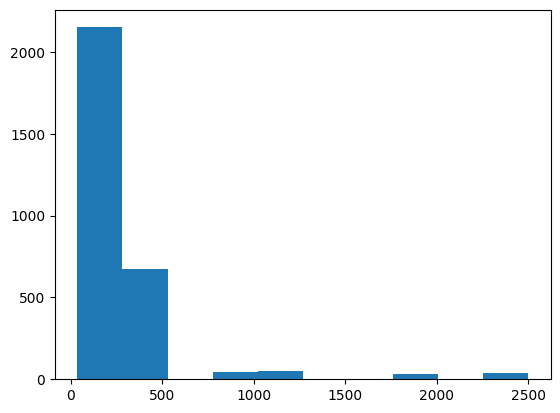

In [ ]:
#analysing the general product revenue customer prefer
plt.hist(buy['revenue_$'])

Customer purchases are heavy on $0 to $500 products

In [ ]:
#Look into the minimum and maximum revenue to categorize the revenue
buy['revenue_$'].describe()

,revenue_$
count,2992.000000
mean,262.786293
std,356.187509
min,35.990000
25%,99.990000
50%,159.990000
75%,299.990000
max,2499.000000


In [ ]:
#categorizing the product revenue
buy['price_category'] = pd.cut(
     x=buy['revenue_$'],
     bins=[0, 500, 1500, 2500],
     labels=['low', 'medium', 'high']
 )

/tmp/ipython-input-3926923519.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  buy['price_category'] = pd.cut(


In [ ]:
#See the price category distribution
pd.crosstab(buy['conversion_flag'], buy['price_category'])

price_category,low,medium,high
conversion_flag,,,
1,2825,100,67


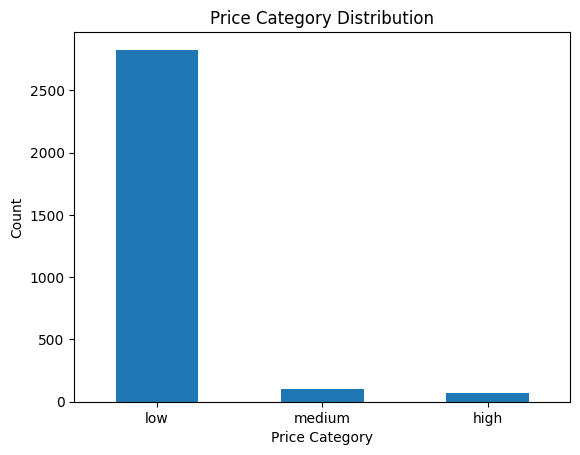

In [ ]:
#Visualize price category distribution
buy['price_category'].value_counts().plot(kind='bar')

plt.title('Price Category Distribution')
plt.xlabel('Price Category')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [ ]:
# Price category percentage across customers
buy['price_category'].value_counts(normalize=True)*100

,proportion
price_category,
low,94.418449
medium,3.342246
high,2.239305


Most customers (94.5%) prefer low priced products

In [ ]:
#Analyse if there's a different price preferences across countries
pd.crosstab(buy['country'], buy['price_category'], normalize='index') * 100

price_category,low,medium,high
country,,,
Australia,93.981481,4.629630,1.388889
Canada,92.608696,3.913043,3.478261
China,93.798450,3.488372,2.713178
France,94.820717,1.992032,3.187251
Germany,95.299145,2.991453,1.709402
Hong Kong,95.959596,1.010101,3.030303
India,95.043732,3.206997,1.749271
Italy,93.750000,4.464286,1.785714
Japan,96.363636,2.727273,0.909091


Customers across countries prefer low priced produce

### Conversion Trend

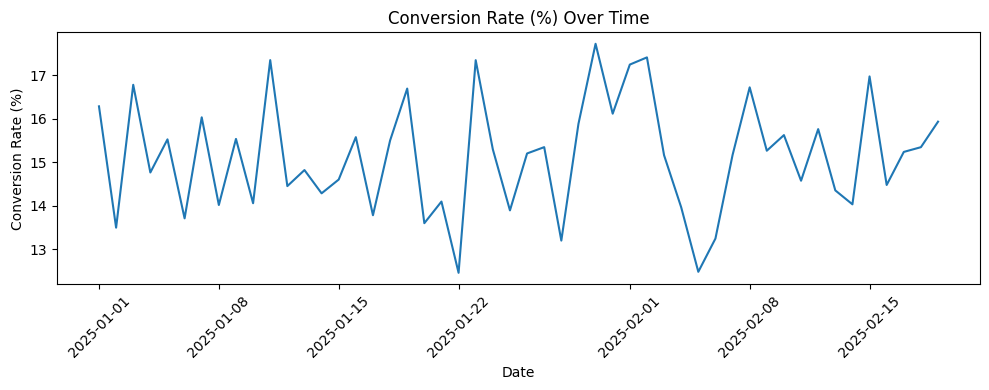

In [ ]:
# Check if there's a pattern over the total time available in the dataset
trend = df.groupby(df['timestamp'].dt.date)['conversion_flag'].mean() * 100

plt.figure(figsize=(10,4))
plt.plot(trend.index, trend.values)
plt.title('Conversion Rate (%) Over Time')
plt.xlabel('Date')
plt.ylabel('Conversion Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#Check the specific date of the highest and lowest date
#sort out the total purchase
sort_trend = trend.sort_values(ascending=False)

#date with top purchase
top3= sort_trend.head(3)

#date with lowest purchase
bottom3 = sort_trend.tail(3)

print(top3)
print(bottom3)

timestamp
2025-01-30    17.725753
2025-02-02    17.412935
2025-01-11    17.350158
Name: conversion_flag, dtype: float64
timestamp
2025-01-28    13.198758
2025-02-05    12.480253
2025-01-22    12.457338
Name: conversion_flag, dtype: float64


There is no pattern as the highest and lowest happend all over the months. Finding a monthly pattern is also risky because there's not enough data as this A/B testing is only done for 2 months.

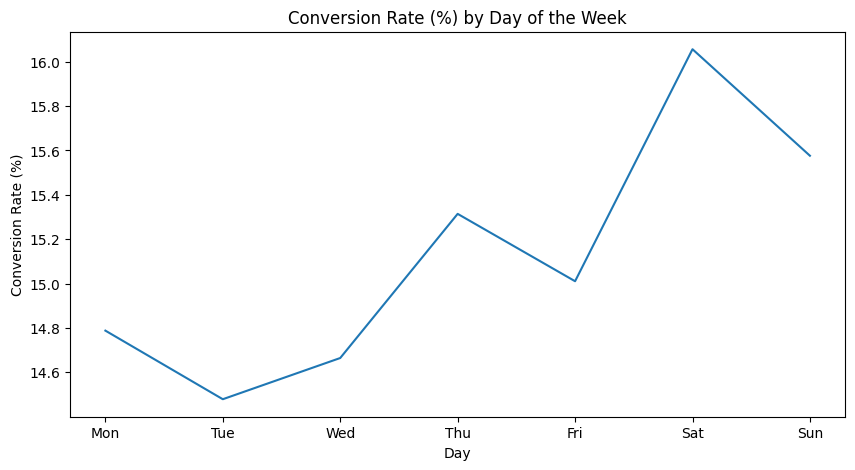

In [ ]:
#Check if there's pattern over week
day = df.groupby(df['timestamp'].dt.dayofweek)['conversion_flag'].mean() * 100

plt.figure(figsize=(10,5))
plt.plot(day.index, day.values)
plt.title('Conversion Rate (%) by Day of the Week')
plt.xlabel('Day')
plt.ylabel('Conversion Rate (%)')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

Top conversion rate happened during the weekend, that is saturday followed by sunday

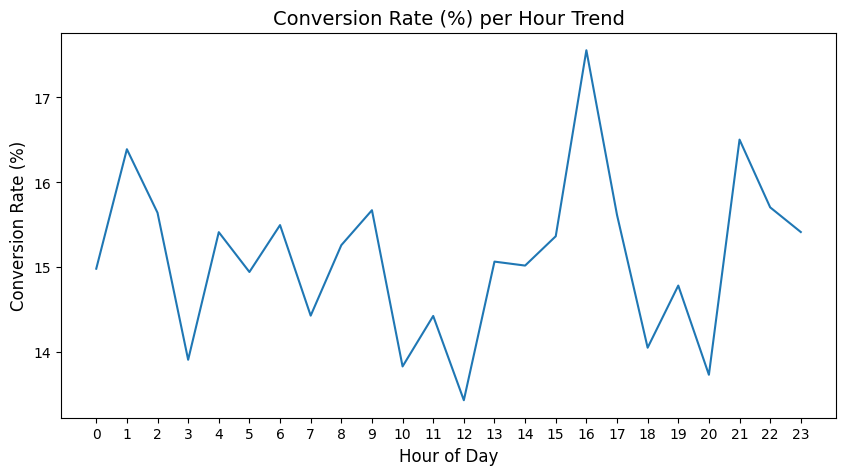

In [ ]:
#Check conversion rate over time
hour = df.groupby(df['timestamp'].dt.hour)['conversion_flag'].mean() * 100

plt.figure(figsize=(10,5))
plt.plot(hour.index, hour.values)
plt.title('Conversion Rate (%) per Hour Trend', fontsize=14)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Conversion Rate (%)', fontsize=12)
plt.xticks(range(0, 24))
plt.show()

Conversion rate is the highest at around 16:00

###Coupon on purchase

We want to see if coupon plays a role in the highest and lowest purchase date. If at the date with high purchase shows there's a higher coupon usage compare to the date with low purchase. We can suggest coupon to increase customers purchases.

In [ ]:
#Check the coupon applied ratio in top puchase date
top3_dates = ['2025-02-08', '2025-01-30', '2025-01-11']
top3_dates = pd.to_datetime(top3_dates).date
top3day = buy[buy['timestamp'].dt.date.isin(top3_dates)]

pd.crosstab(top3day['coupon_applied'], top3day['conversion_type'])

conversion_type,Purchase
coupon_applied,
No,159
Yes,73


In [ ]:
#Check the coupon applied ratio in bottom puchase date
bottom3_dates = ['2025-01-02', '2025-02-04', '2025-01-08']
bottom3_dates = pd.to_datetime(bottom3_dates).date
bottom3day = buy[buy['timestamp'].dt.date.isin(bottom3_dates)]

pd.crosstab(bottom3day['coupon_applied'], bottom3day['conversion_type'])

conversion_type,Purchase
coupon_applied,
No,108
Yes,35


As a results, customer did not make a higher purchase due to coupon. In fact, both at the top purchase date and low purchase date, most customers do not use a coupon. Thus, it was not due to coupon that drive customer on their purchases. We might have to find another strategy to increase purchases.

###Conversions and average revenue of country relation

We want to see if a country with higher conversion (both sign up and purchase) drives into more revenue. If higher conversion country pushes more revenue, we can make strategy to increase engagement of each country

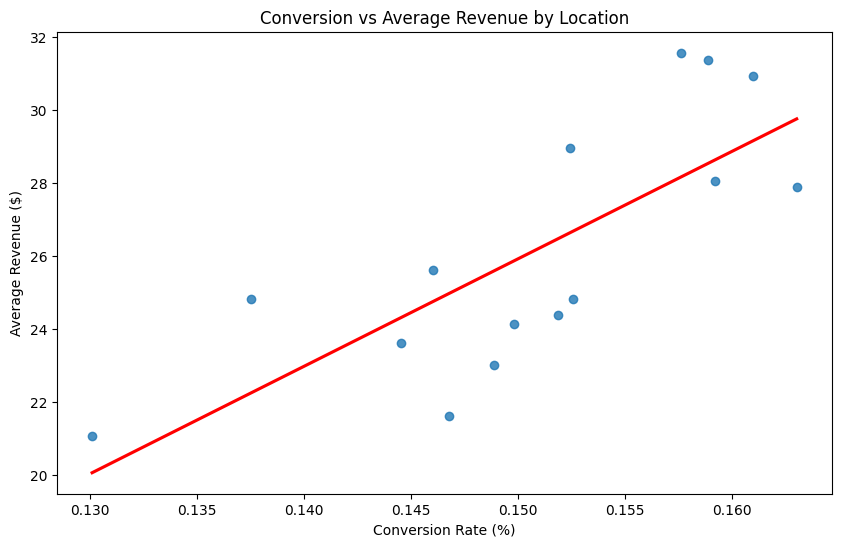

In [ ]:
#Plot scatter plot to see relation between conversion rate and country's average revenue
#Each dot represents the average revenue and conversion rate of one country

loc = df.groupby('country', as_index=False).agg({
    'conversion_flag': 'mean',
    'revenue_$': 'mean'
})

plt.figure(figsize=(10,6))
sns.regplot(
    data=loc,
    x='conversion_flag',
    y='revenue_$',
    scatter=True,
    ci=None,
    line_kws={'color': 'red'}
)
plt.title('Conversion vs Average Revenue by Location')
plt.xlabel('Conversion Rate (%)')
plt.ylabel('Average Revenue ($)')
plt.show()

There's a positive relation of conversion rate and average country's revenue. Thus we need to increase conversion rate to obtain better revenue to the business

In [ ]:
#See the top conversion rate country
country_conv = df.groupby('country')['conversion_flag'].mean() * 100
country_conv = country_conv.reset_index()
country_conv.columns = ['country', 'conversion rate (%)']
print(country_conv.sort_values(by='conversion rate (%)', ascending=False))

      country  conversion rate (%)
12        UAE            16.303400
11      Spain            16.098807
1      Canada            15.922494
2       China            15.889085
3      France            15.764192
4     Germany            15.259455
14        USA            15.243902
0   Australia            15.188230
7       Italy            14.982578
13         UK            14.888124
8       Japan            14.679294
10  Singapore            14.605735
6       India            14.451686
9      Russia            13.752277
5   Hong Kong            13.010204


Top 3 conversion rate countris are UAE, Spain, and Canada.

Discussions of the results can be seen through this powerpoints: [Sales Speaker Sales Project](https://www.canva.com/design/DAG3PL0nrJ4/7DTJHj4qmsi-_Sfpa0hG8g/edit)